
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd

## Load the data into a DataFrame
# pd.read_csv()
booze = pd.read_csv('./../Iowa_Liquor_sales_sample_10pct.csv')
## Transform the dates if needed, e.g.
booze['Date'] = pd.to_datetime(booze['Date'], infer_datetime_format=True)

In [4]:
booze['Sale (Dollars)'] = booze['Sale (Dollars)'].str.replace('$', '').astype(float)
booze['State Bottle Retail'] = booze['State Bottle Retail'].str.replace('$', '').astype(float)
booze['State Bottle Cost'] = booze['State Bottle Cost'].str.replace('$', '').astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [6]:
new_df = pd.DataFrame()
for col in ['Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)']:
    new_df[col] = (booze[col] - booze[col].mean()) / booze[col].std()
#creates a new normalized dataframe 

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,2.709550e+05,2.709550e+05,2.709550e+05,2.709550e+05,2.709550e+05,2.709550e+05,2.709550e+05
mean,6.356611e-17,3.912568e-17,1.602789e-16,2.134605e-17,-2.805930e-18,2.640721e-17,-2.659077e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.774185e+00,-1.260555e+00,-1.261644e+00,-3.690078e-01,-3.330372e-01,-3.071677e-01,-3.067262e-01
25%,-3.545618e-01,-6.063869e-01,-6.060239e-01,-3.274121e-01,-2.570374e-01,-2.587477e-01,-2.582854e-01
50%,-3.545618e-01,-2.516320e-01,-2.275995e-01,-1.610290e-01,-1.523191e-01,-1.290514e-01,-1.286734e-01
75%,1.524466e-01,3.046236e-01,3.031406e-01,8.854552e-02,1.591955e-02,5.252352e-02,5.199792e-02
max,1.029261e+01,5.892148e+01,5.892296e+01,1.039116e+02,9.467600e+01,8.643029e+01,8.642989e+01


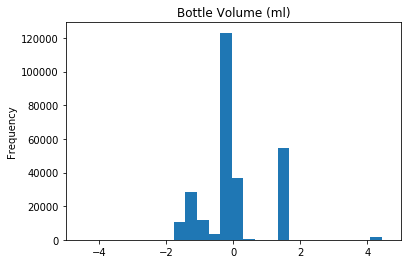

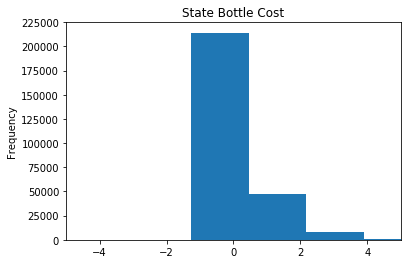

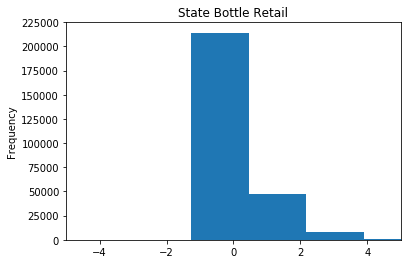

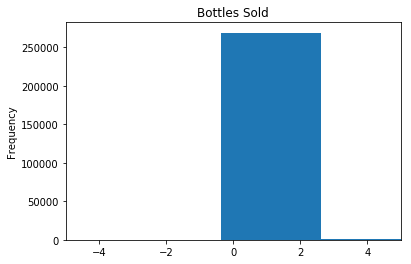

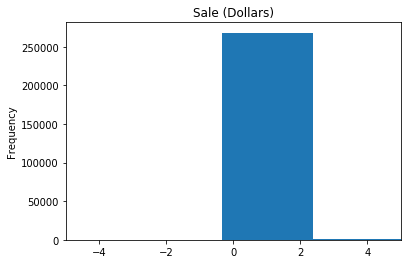

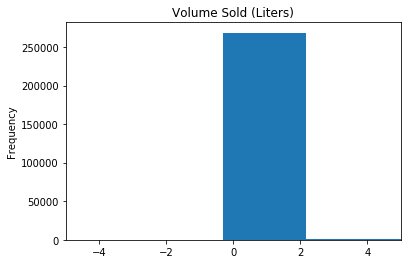

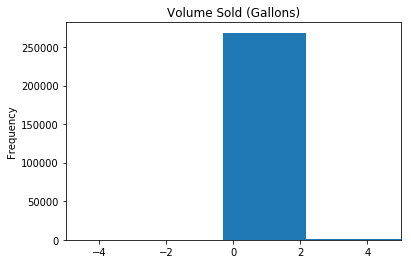

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for col in new_df.columns:
    new_df[col].plot(kind='hist', bins=35)
    plt.xlim((-5, 5))
    plt.title(col)
    plt.show()

In [51]:
list_outliers = []

for col in new_df.columns:
    df = new_df.loc[(new_df[col] > 4) | (new_df[col] < -3)]
    list_outliers.extend(list(df.index))

len(set(list_outliers))
#Finds the row #s from my normalized table where there are values that lie more than 4 standard deviations from the mean.

4705

In [30]:
mask = booze['Bottles Sold'] > 1700
eliminated_rows = booze[mask]
booze = booze.drop(booze[mask].index)
booze.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,270952.000000,269875.000000,2.708840e+05,270952.000000,270952.000000,270952.000000,270952.000000,270952.000000,270952.000000,270952.000000,270952.000000,270952.000000
mean,3590.258669,57.231948,1.043888e+06,256.434590,45975.082133,924.832461,9.773323,14.675823,9.846637,128.703369,8.963780,2.368189
std,947.663596,27.341115,5.018238e+04,141.014945,52757.322446,493.089210,7.047132,10.570165,22.847928,376.730000,28.289644,7.473327
min,2106.000000,1.000000,1.011100e+06,10.000000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.000000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.000000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.000000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.000000,995507.000000,6000.000000,425.000000,637.500000,1320.000000,36392.400000,2100.000000,554.760000


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

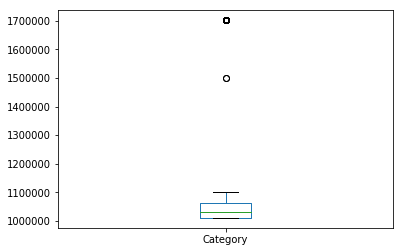

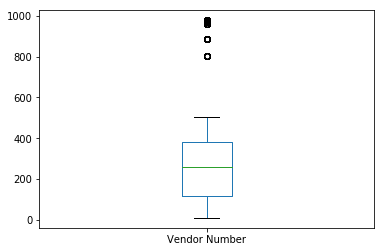

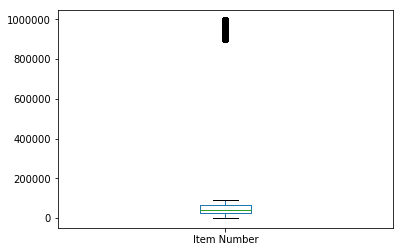

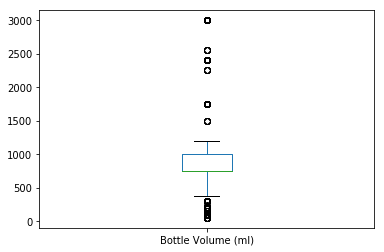

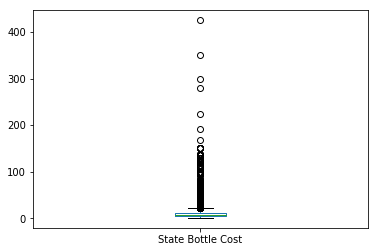

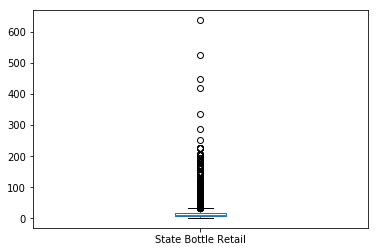

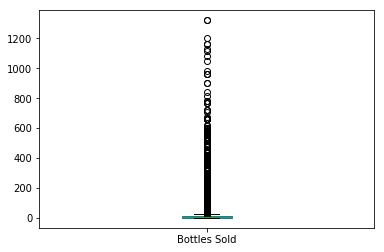

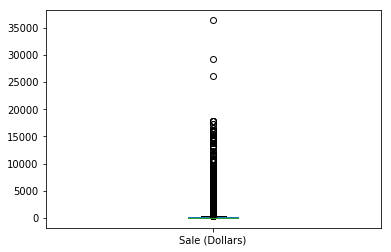

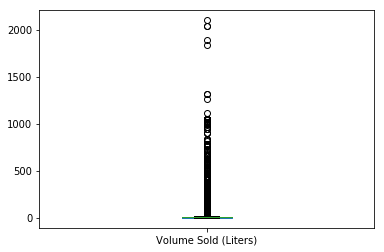

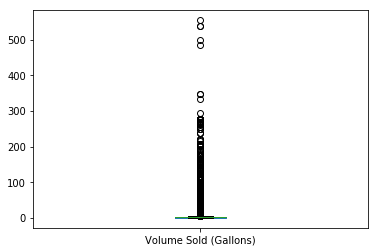

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in booze.columns:
    try:
        booze[col].plot(kind='box')
        plt.show()
    except:
        continue

In [41]:
mask2 = booze['Bottle Volume (ml)'] > 3000
eliminated_rows = eliminated_rows.append(booze[mask2])
booze = booze.drop(booze[mask2].index)

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.